In [14]:
import torch
from einops import rearrange
import numpy as np

In [28]:
B = 64
H = 128
W = 128
C = 3
p = 16


In [29]:
# x will be of shape (B, C, H, W)
def patchify(x: torch.tensor, p: int):

    _, _, H, W = x.shape

    assert H % p == 0, "Invalid patch_size"
    assert W % p == 0, "Invalid patch_size"

    y = rearrange(x, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = p, p2 = p)

    return y

# x will be of shape (B, H/P * W/P, p * p * c)
def depatchify(y: torch.tensor, H:int, W:int, p: int):

    _, num_tokens, _ = y.shape  
    h1 = H//p
    w1 = W//p

    assert num_tokens == (h1 * w1) , "Invalid dimensions"

    x = rearrange(y, "b (h1 w1) (p1 p2 c) -> b c (h1 p1) (w1 p2)", h1 = h1, w1 = w1, p1 = p, p2 = p)

    return x

x = torch.randn((B, C, H, W))
y = patchify(x, p)
x_rec = depatchify(y, H, W, p)

print(torch.allclose(x, x_rec))




True


In [ ]:
import torch
import torch.nn as nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer


class Encoder(nn.Module):
    def __init__(self, num_layers: int, d_model: int, nhead: int, dim_feedforward: int):
        super().__init__()

        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            batch_first=True
        )

        self.encoder = TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x: torch.Tensor):  # (B, num_tokens, d_model)
        return self.encoder(x)


class PositionalEncoding(nn.Module):
    def __init__(self, num_tokens: int, d_model: int):
        super().__init__()
        self.pos_emb = nn.Parameter(torch.randn(1, num_tokens, d_model))

    def forward(self, x: torch.Tensor):
        return x + self.pos_emb
    

class Transformer(nn.Module):
    def __init__(self, num_layers, num_tokens, d_model, dim_feedforward, nhead):
        super().__init__()
        self.pos_emb = PositionalEncoding(num_tokens, d_model)
        self.encoder = Encoder(num_layers, d_model, nhead, dim_feedforward)

    def forward(self, x: torch.Tensor):
        x = self.pos_emb(x)
        x = self.encoder(x)
        return x


In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform (convert images to tensors)
transform = transforms.ToTensor()

# Download training set
train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

# Download test set
test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    transform=transform,
    download=True
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("MNIST downloaded and loaded!")


100%|██████████| 9.91M/9.91M [00:02<00:00, 3.78MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 587kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.34MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

MNIST downloaded and loaded!


In [23]:
import matplotlib.pyplot as plt
s = 0
for x, y in train_loader:
   s = x
   break

torch.Size([64, 196, 4])
torch.Size([64, 196, 4])
torch.Size([64, 196, 4])
torch.Size([28, 28])


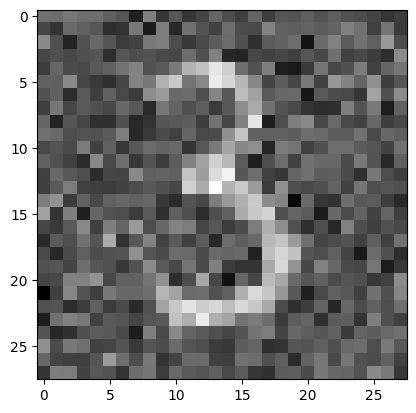

In [58]:
"""
# printing
print(s.shape)
x = s[0].squeeze(0)
print(x.shape)


plt.imshow(x, cmap='gray')
plt.axis('off')
"""


"""
batch_size = 10
x = np.random.rand(batch_size)
print(x)
"""

"""
def generate_random_gaussian(batch_size, d_model):
    x = np.random.randn(d_model, batch_size)

    return x
"""


# x1 [B, num_tokens, d_model] 
# t is a list of random times [0.3,....,0.89, 1]  shape: [batch_size]
def one_step_training(x1, t, model):
    
    x0 = torch.randn_like(x1)
    t = t.unsqueeze(1)
    t = t.unsqueeze(2)
    xt = (1 - t)*x0 + t*x1
    
    v_true = x1 - x0
    v_predicted = model(xt, t)

    loss = torch.mean((v_predicted - v_true) ** 2)

    return loss


for X1, _ in train_loader:
    break

x1 = patchify(X1, 2)

Batch_size, num_tokens, d_model = x1.shape
x0 = torch.randn_like(x1)
t = torch.rand((Batch_size))  
t = t.unsqueeze(1)
t = t.unsqueeze(2)
xt = (1 - t)*x0 + t*x1



print(x0.shape)
print(x1.shape)
print(xt.shape)

y = depatchify(xt, 28, 28, 2)
y = y[0]
y = y[0]
print(y.shape)
plt.imshow(y, cmap="gray")

    


In [44]:
x = torch.randn((10))
print(x)
x = x.unsqueeze(1)
x = x.unsqueeze(2)
print(x.shape)

tensor([-0.3347, -0.7267,  0.2736, -0.3685,  0.4808, -0.0066,  0.9255,  1.2339,
        -0.5439, -1.2103])
torch.Size([10, 1, 1])
